## Task 3: Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NewDataset/cleaned_dataset.csv", parse_dates = ['Date'])
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Order Sucess,Weekday,Total items
0,0,405-8078784-5731545,2022-04-30,Cancelled,merchant,amazon.in,standard,SET389,SET389-KR-NP-S,Set,...,cancelled,0,647.62,MUMBAI,Maharashtra,400081.0,False,False,Saturday,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,merchant,amazon.in,standard,JNE3781,JNE3781-KR-XXXL,kurta,...,shipped,1,406.00,BENGALURU,Karnataka,560085.0,False,True,Saturday,1
2,2,404-0687676-7273146,2022-04-30,Shipped,amazon,amazon.in,expedited,JNE3371,JNE3371-KR-XL,kurta,...,shipped,1,329.00,NAVI MUMBAI,Maharashtra,410210.0,True,False,Saturday,1
3,3,403-9615377-8133951,2022-04-30,Cancelled,merchant,amazon.in,standard,J0341,J0341-DR-L,Western Dress,...,cancelled,0,753.33,PUDUCHERRY,Puducherry,605008.0,False,False,Saturday,1
4,4,407-1069790-7240320,2022-04-30,Shipped,amazon,amazon.in,expedited,JNE3671,JNE3671-TU-XXXL,Top,...,shipped,1,574.00,CHENNAI,Tamil Nadu,600073.0,False,False,Saturday,1


<Axes: xlabel='Qty'>

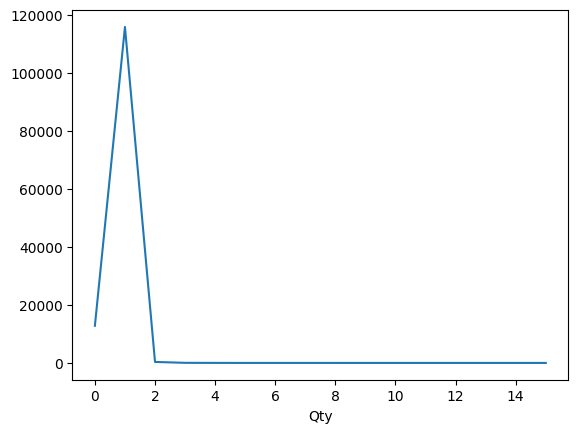

In [3]:
df['Qty'].value_counts().sort_index().plot()

In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'Order Sucess', 'Weekday', 'Total items'],
      dtype='object')

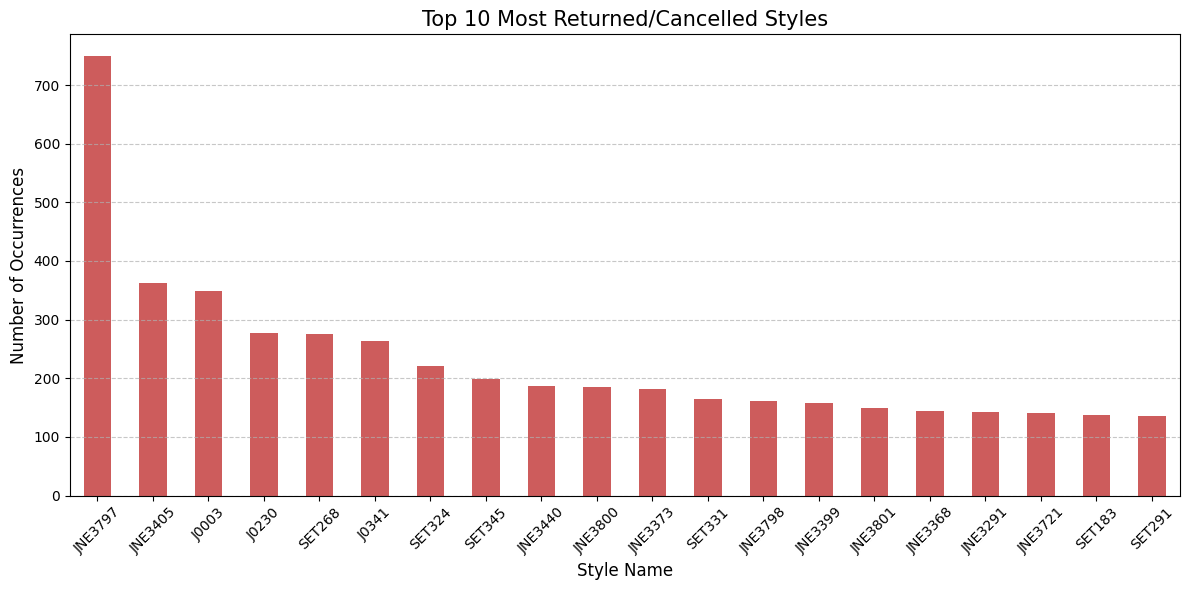

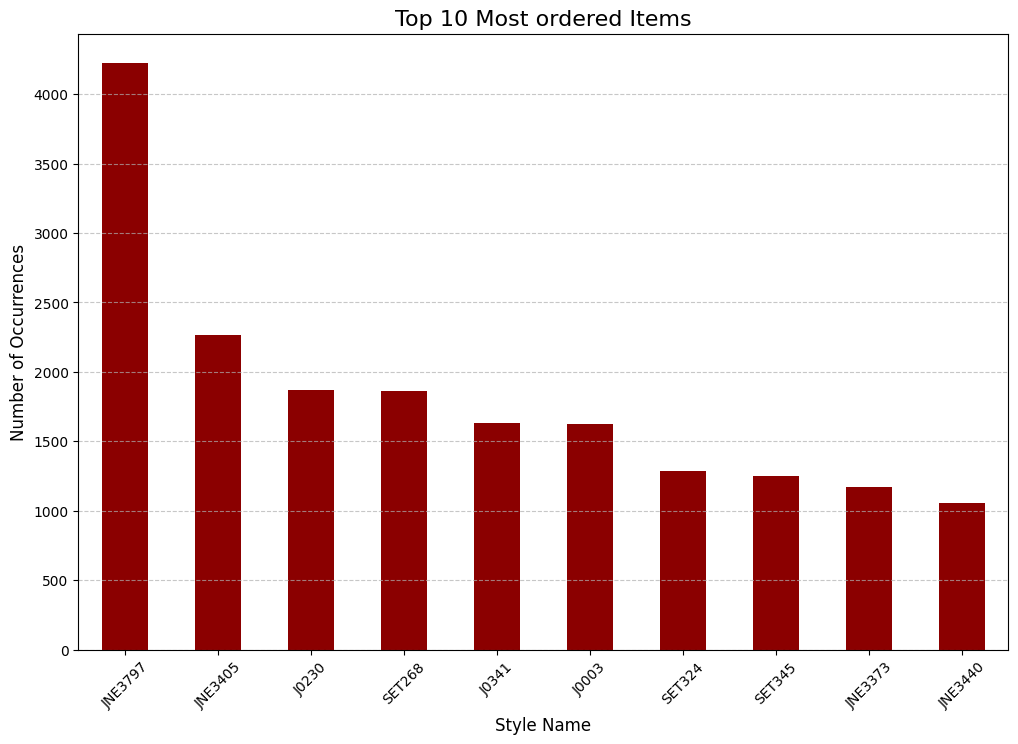

In [5]:
# 1. Filter for cancelled/returned status
canc = ['Cancelled', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged']
cancelled_df = df[df['Status'].isin(canc)]

top_10_styles = cancelled_df['Style'].value_counts().head(20)

plt.figure(figsize=(12, 6))
top_10_styles.plot(kind='bar', color='indianred')

plt.title('Top 10 Most Returned/Cancelled Styles', fontsize=15)
plt.xlabel('Style Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print()

top_10_st = df['Style'].value_counts().head(10)
plt.figure(figsize = (12, 8))
top_10_st.plot(kind = 'bar', color = 'darkred')
plt.title('Top 10 Most ordered Items', fontsize = 16)
plt.xlabel('Style Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Most Styles Sold by Quantity

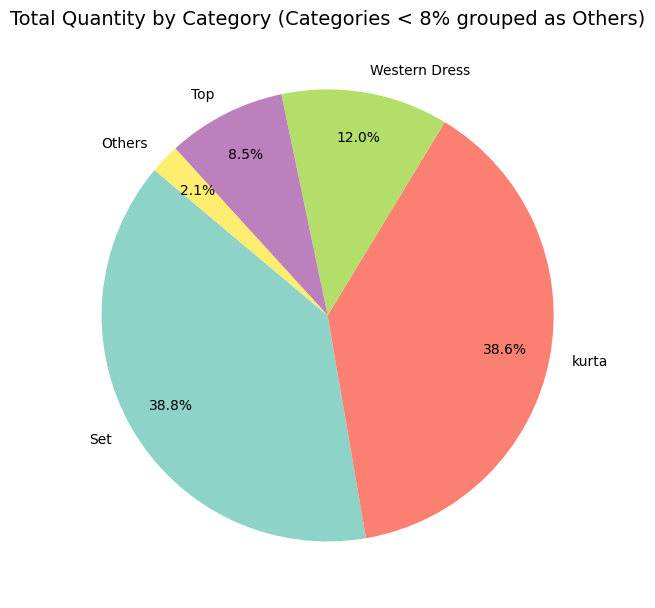

In [6]:

category_qty = df.groupby('Category')['Qty'].sum()

total_qty = category_qty.sum()
category_percentages = (category_qty / total_qty) * 100

threshold = 8.0
mask = category_percentages < threshold

top_categories = category_qty[~mask]
others_sum = category_qty[mask].sum()

plot_data = top_categories.copy()
if others_sum > 0:
    plot_data['Others'] = others_sum

plot_data = plot_data.sort_values(ascending=False)

plt.figure(figsize=(6, 8))
plot_data.plot(
    kind='pie', 
    autopct='%1.1f%%',      # Displays the calculated percentage
    startangle=140, 
    cmap='Set3', 
    pctdistance=0.80,       # Position of percentage text
    labeldistance=1.1       # Position of category labels
)

plt.title('Total Quantity by Category (Categories < 8% grouped as Others)', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

Busiest Dates:
         Date  Order Count
33 2022-05-03         1941
32 2022-05-02         1906
34 2022-05-04         1896
14 2022-04-14         1754
15 2022-04-15         1733
20 2022-04-20         1709
24 2022-04-24         1698
23 2022-04-23         1698
31 2022-05-01         1663
10 2022-04-10         1646


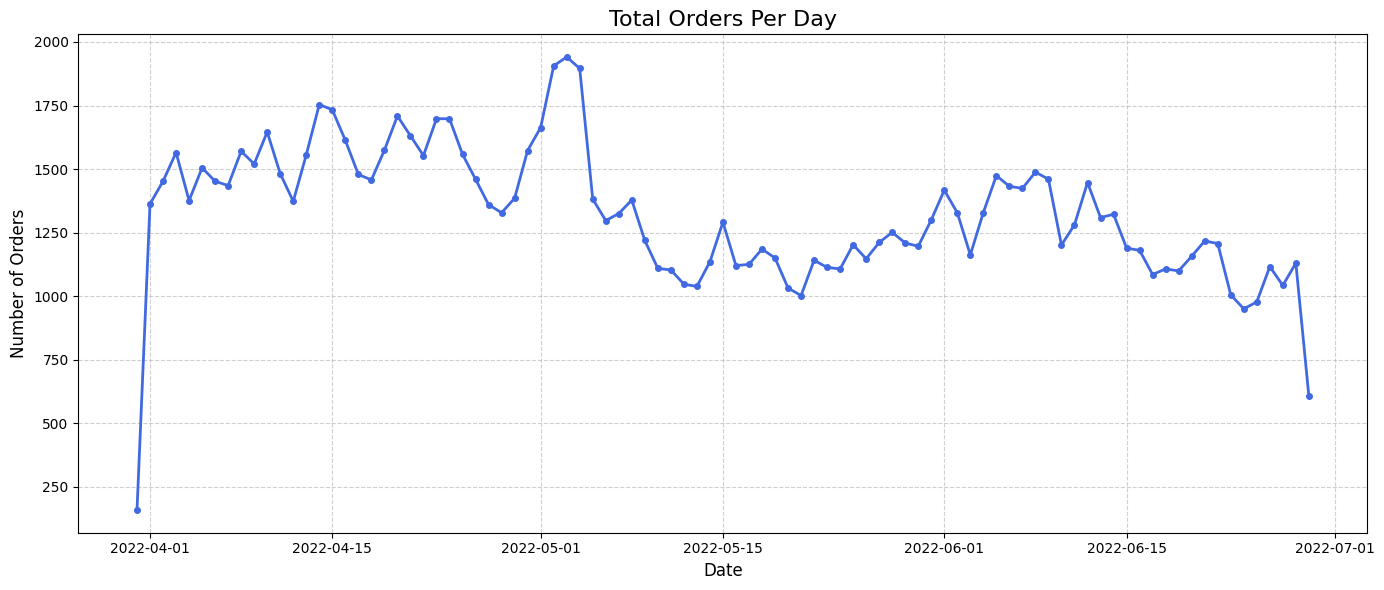

In [7]:
# 1. Group by Date and count UNIQUE Order IDs
daily_orders = df.groupby('Date')['Order ID'].nunique().reset_index()
daily_orders.columns = ['Date', 'Order Count']

# 2. Sort by date to see the trend chronologically
daily_orders = daily_orders.sort_values('Date')

# 3. Get the Top 10 busiest dates
top_10_dates = daily_orders.sort_values('Order Count', ascending=False).head(10)
print("Busiest Dates:")
print(top_10_dates)

# 4. Plotting the trend over time
plt.figure(figsize=(14, 6))
plt.plot(daily_orders['Date'], daily_orders['Order Count'], color='royalblue', marker='o', markersize=4, linewidth=2)

plt.title('Total Orders Per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation= 0)
plt.tight_layout()
plt.show()


### Contribution of B2B businesses on order contributions

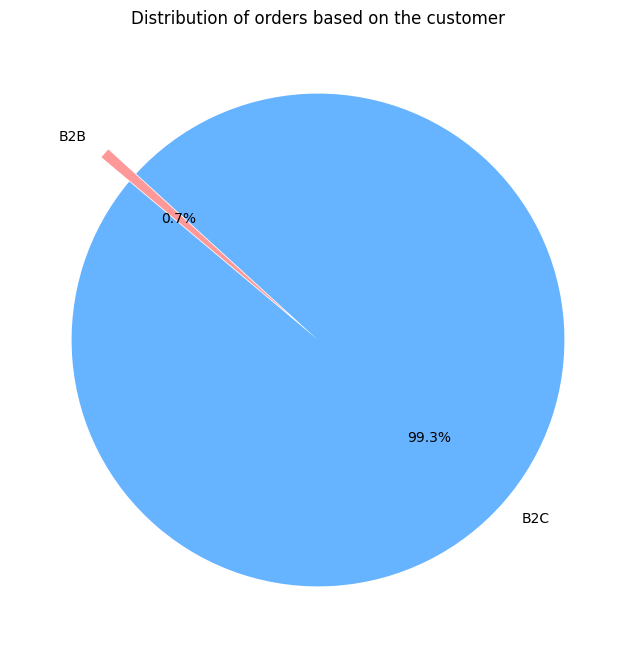

In [8]:
b2b_chart = df['B2B'].value_counts()
labels = ['B2B' if index == True else 'B2C' for index in b2b_chart.index]

plt.figure(figsize = (8,8))
plt.pie(
    b2b_chart, 
    labels = labels,
    autopct = '%1.1f%%',
    startangle = 140,
    colors = ['#66b3ff', '#ff9999'],
    explode=(0, 0.15) if len(b2b_chart) > 1 else None
)

plt.title('Distribution of orders based on the customer')
plt.show()

### Order Distribution based on the days of the week, to get the peak time when orders are coming.

<Axes: xlabel='Weekday'>

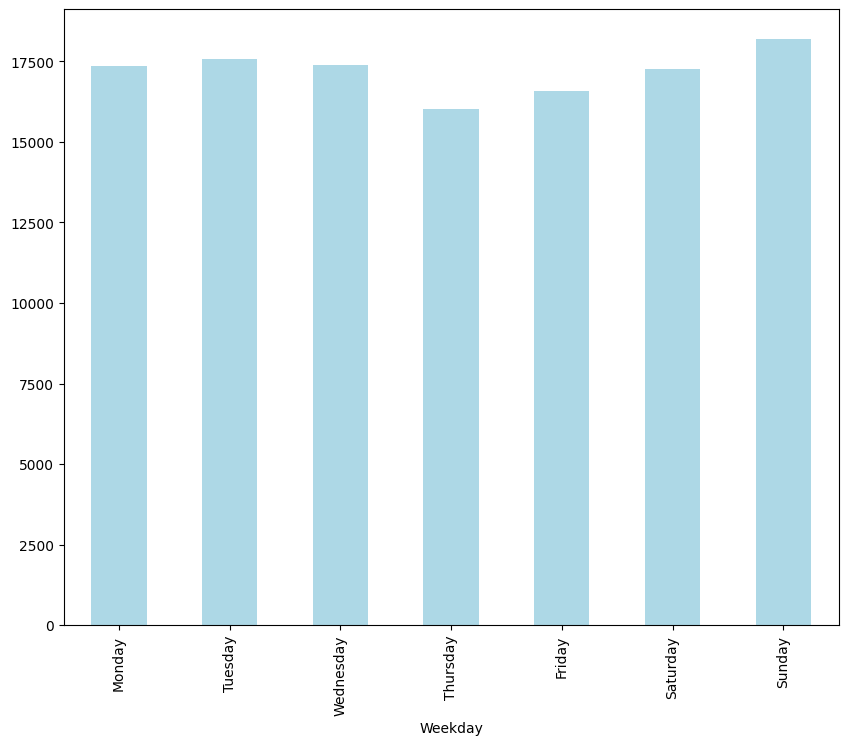

In [9]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_group = df.groupby('Weekday')['Order ID'].nunique().reindex(day_order)

day_group.plot(kind = 'bar', color = 'lightblue', figsize = (10, 8))

In [10]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

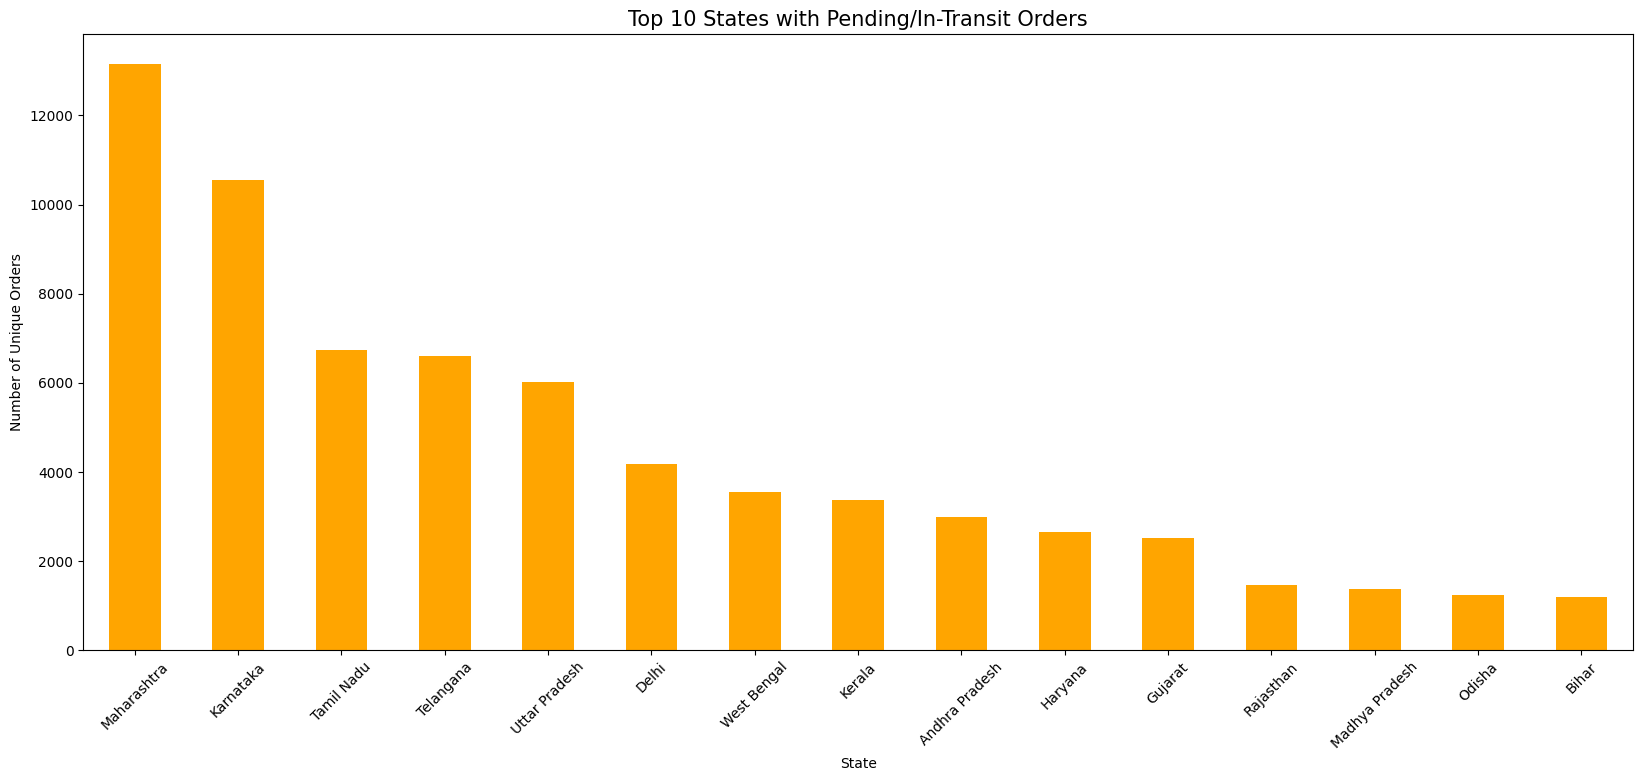

In [11]:
df_success = df[df['Status'] == 'Shipped - Delivered to Buyer']
pending = ['Shipped', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery', 'Shipped - Picked Up', 'Pending', 'Pending - Waiting for Pick Up', 'Shipping']
pending_df = df[df['Status'].isin(pending)]

state_info = pending_df.groupby('ship-state')['Order ID'].nunique().sort_values(ascending = False)

plt.figure(figsize = (20, 8))
state_info.head(15).plot(kind='bar', color='orange')
plt.title('Top 10 States with Pending/In-Transit Orders', fontsize=15)
plt.ylabel('Number of Unique Orders')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

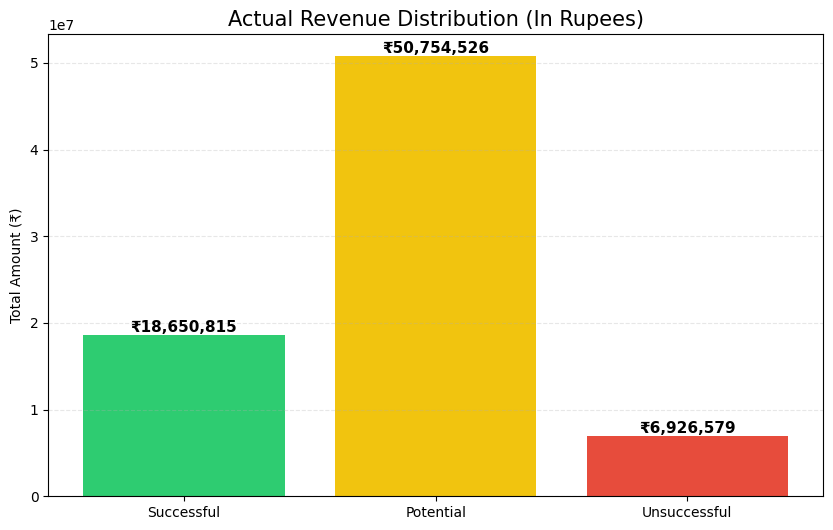

In [12]:
df_success = df[df['Status'] == 'Shipped - Delivered to Buyer']
pending_df = df[df['Status'].isin(['Shipped', 'Pending', 'Shipping'])] # Add your list here
cancelled_df = df[df['Status'].isin(['Cancelled', 'Shipped - Rejected by Buyer'])] # Add your list here

labels = ['Successful', 'Potential', 'Unsuccessful']
amounts = [df_success['Amount'].sum(), pending_df['Amount'].sum(), cancelled_df['Amount'].sum()]
colors = ['#2ecc71', '#f1c40f', '#e74c3c']

# 2. Plotting Actual Amounts
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, amounts, color=colors)

# Adding the exact amount on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'₹{int(yval):,}', 
             va='bottom', ha='center', fontweight='bold', fontsize=11)

plt.title('Actual Revenue Distribution (In Rupees)', fontsize=15)
plt.ylabel('Total Amount (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

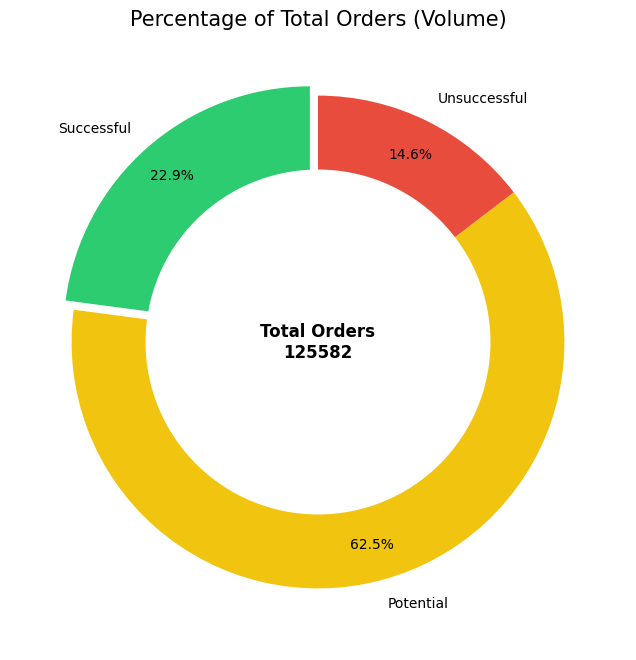

In [13]:
counts = [len(df_success), len(pending_df), len(cancelled_df)]

# 2. Plotting Order Percentages
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, pctdistance=0.85, explode=(0.05, 0, 0))

# Create the Donut Hole
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Percentage of Total Orders (Volume)', fontsize=15)
plt.annotate(f'Total Orders\n{sum(counts)}', (0,0), ha='center', va='center', 
             fontsize=12, fontweight='bold')
plt.show()

In [14]:
# import plotly.express as px
# import plotly.io as pio

# # 1. Force Jupyter to render the Plotly graph
# pio.renderers.default = 'notebook_connected'

# # 2. Prepare the data
# state_data = df.groupby('ship-state')['Order ID'].nunique().reset_index()
# state_data.columns = ['State', 'Order_Count']

# # 3. Comprehensive State Name Cleaning
# # Mapping your data strings to the exact strings in the GeoJSON
# state_mapping = {
#     'Delhi': 'NCT of Delhi',
#     'Andaman & Nicobar': 'Andaman & Nicobar Island',
#     'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
#     'Arunachal Pradesh': 'Arunachal Pradesh',
#     'Telangana': 'Telangana'
# }

# # Apply Title Case first, then apply the specific mapping fixes
# state_data['State'] = state_data['State'].str.title()
# state_data['State'] = state_data['State'].replace(state_mapping)

# # Remove 'nan' and 'Armed Forces Post Office' as they don't have map coordinates
# state_data = state_data.dropna(subset=['State'])
# state_data = state_data[state_data['State'] != 'Armed Forces Post Office']

# # 4. GeoJSON URL for India States
# india_states_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d1a4501f2ce8911ad99/raw/e38cfdac3641961c7145d7c40d84881854553b1b/india_states.geojson"

# # 5. Create the Figure
# fig = px.choropleth(
#     state_data,
#     geojson=india_states_url,
#     featureidkey='properties.ST_NM', # Matches the GeoJSON internal key
#     locations='State',               # Matches our 'State' column
#     color='Order_Count',
#     color_continuous_scale="Reds",
#     title='<b>Total Orders by State (Geographical Heatmap)</b>',
#     template='plotly_white',
#     labels={'Order_Count': 'Unique Orders'}
# )

# # 6. Focus the map on India specifically
# fig.update_geos(
#     fitbounds="locations", 
#     visible=False
# )

# # 7. Add layout adjustments for a cleaner look
# fig.update_layout(
#     margin={"r":0,"t":50,"l":0,"b":0},
#     title_x=0.5 # Center the title
# )

# # 8. Show the map
# fig.show()

In [15]:
# df[df['Status'].in(cancelled)]